In [1]:
import pymongo
import json
import csv

import numpy as np
import pandas as pd
from bson.objectid import ObjectId

#import seaborn as sns
#print(sns.__version__)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from database.query import *

from utils import *
%load_ext autoreload

%matplotlib inline

In [2]:
client = pymongo.MongoClient()
col = client['tweets']['april']
print(col.count())

1571095


In [4]:
col.find_one()

{'_id': ObjectId('5ad7c4b9603fa924356751b6'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Apr 18 22:20:41 +0000 2018',
 'display_text_range': [10, 49],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 55667775,
    'id_str': '55667775',
    'indices': [0, 9],
    'name': 'Lizzy',
    'screen_name': 'LizzyMtl'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 986731267818483712,
 'id_str': '986731267818483712',
 'in_reply_to_screen_name': 'LizzyMtl',
 'in_reply_to_status_id': 986730725658517505,
 'in_reply_to_status_id_str': '986730725658517505',
 'in_reply_to_user_id': 55667775,
 'in_reply_to_user_id_str': '55667775',
 'is_quote_status': False,
 'labels': 0,
 'lang': 'fr',
 'physical_activity_ensemble_predict': 0.017417605192251176,
 'place': {'attributes': {},
  'bounding_box': {'coordinates': [[[-79.751655, 48.925607],
     [-79.751655, 55.004616],
     [-69.991256, 55.004616],
     

In [6]:
%%time

tweets_df = DataAccess.get_as_dataframe(explode=False)
#tweets_df = DataAccess.sample_control(0.0, 0.10)
tweets_df.head()

print(len(tweets_df))

1571571
CPU times: user 41.9 s, sys: 716 ms, total: 42.6 s
Wall time: 53 s


In [7]:
tweets_df.head()

,entities,place,text
_id,,,
5ad7c4ba603fa924356751b7,{'hashtags': []},"{'country': 'Canada', 'full_name': 'Mississaug...",@tuinpeaks RIGHT the romance isn't even the ma...
5ad7c4ba603fa924356751b8,{'hashtags': []},"{'country': 'Canada', 'full_name': 'Vancouver,...",@sarahblyth Yay!!
5ad7c4ba603fa924356751b9,{'hashtags': []},"{'country': 'Canada', 'full_name': 'Calgary, A...","@cardiacclone32 Just say ""I had a good poop to..."
5ad7c4bb603fa924356751ba,{'hashtags': []},"{'country': 'Canada', 'full_name': 'Toronto, O...",!!!!! Like wtf 😭 https://t.co/4Y1mKCv6nE
5ad7c4bc603fa924356751bb,{'hashtags': []},"{'country': 'Canada', 'full_name': 'Montréal, ...",@ElcrazyToutdoux 🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀️😭


In [29]:
tweets_df.to_csv('./data/tweets_with_id.csv', sep='\t')

In [64]:
column_name = "labels"

col.update({"_id": ObjectId("5ad7c4b9603fa924356751b6")}, {"$set": {column_name: 0}})

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  app.launch_new_instance()


{'n': 0, 'nModified': 0, 'ok': 1, 'updatedExisting': False}

In [218]:
def write_labels_batch(dataframe):
    for _id, dict_labels in dataframe.T.to_dict().items():
        for key, value in dict_labels.items():
            if isinstance(value, np.int64):
                dict_labels[key] = value.item()
        print(_id, dict_labels)
            #col.find_one_and_update({"_id": ObjectId(_id)}, {"$set": {column_name: label}})

In [219]:
write_labels_batch(tweets_df.loc[:, ['label', 'labels']][:5])

5ad7c6db603fa9243fc7b45b {'label': 0, 'labels': 0}
5ad7c5a3603fa9243fc7b2fd {'label': 0, 'labels': 0}
5ad7c760603fa9243fc7b507 {'label': 0, 'labels': 0}
5ad7c80a603fa9243fc7b5df {'label': 0, 'labels': 0}
5ad7c7a5603fa9243fc7b562 {'label': 0, 'labels': 0}


In [19]:
data = list(col.find({"retweeted_status": {"$exists": True}}))

In [20]:
len(data)

0

In [34]:
col.find_one({"_id": ObjectId("5a26f7a1b13879ecbb4a6d49")})
#col.find_one_and_update({"_id": ObjectId("5adc8cc0603fa92b91518df3")}, {"$set": {column_name: label}})

{'_id': ObjectId('5a26f7a1b13879ecbb4a6d49'),
 'contributors': None,
 'coordinates': {'coordinates': [-76.567205, 44.2719951], 'type': 'Point'},
 'created_at': 'Thu Nov 30 20:03:10 +0000 2017',
 'entities': {'hashtags': [{'indices': [0, 7], 'text': 'Repost'}],
  'symbols': [],
  'urls': [{'display_url': 'instagram.com/p/BcIdCuPD-_H/',
    'expanded_url': 'https://www.instagram.com/p/BcIdCuPD-_H/',
    'indices': [89, 112],
    'url': 'https://t.co/T7nm1AvjIZ'}],
  'user_mentions': [{'id': 3393133781,
    'id_str': '3393133781',
    'indices': [8, 16],
    'name': 'theironkingltd',
    'screen_name': 'ppcli66'},
   {'id': 261108510,
    'id_str': '261108510',
    'indices': [46, 55],
    'name': 'Tim Cronk',
    'screen_name': 'TimCronk'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': {'coordinates': [44.2719951, -76.567205], 'type': 'Point'},
 'id': 936324749084545026,
 'id_str': '936324749084545026',
 'in_reply_to_screen_name': None,
 'in_reply_to_status

In [145]:
tweets_df = [{"created_at": item["created_at"],
              "text": item['extended_tweet']['full_text'],
              "_id": item["_id"]
            } for item in col.find({"place.country_code": "CA"}) if item['truncated']]

In [25]:
for item in col.find({"place.country_code": "CA"}):
    if item['retweeted'] or item['retweet_count'] != 0 or 'retweeted_status' in item:
        print(item)
        input()

In [5]:
for item in col.find({"place.country_code": "CA"}):
    if item['truncated']:
        col.find_one_and_update({"_id": item['_id']}, {"$set": {"text": item['extended_tweet']['full_text']}})

In [3]:
col.find({"lang": {"$ne": 'en'}}).count()


1460498

In [16]:
col.remove({"lang": {"$ne": 'en'}})

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  if __name__ == '__main__':


{'n': 1460498, 'ok': 1}

In [ ]:
%%time

tweets_df = list(col.find({"lang": {"$ne": 'en'}}))
print(len(tweets_df))

In [ ]:
%%time

tweets_df = list(col.find({"lang": {"$ne": 'en'}}))
print(len(tweets_df))

In [42]:
%%time

tweets_df['created_at'] = pd.to_datetime(tweets_df.created_at)

CPU times: user 39min 37s, sys: 4.06 s, total: 39min 41s
Wall time: 39min 39s


In [60]:
tweets_df.set_index('created_at').groupby(pd.TimeGrouper('W')).sum()

,value
created_at,
2017-11-05,3598.0
2017-11-12,NaN
2017-11-19,180463.0
2017-11-26,391833.0
2017-12-03,202223.0
2017-12-10,324609.0
2017-12-17,416345.0
2017-12-24,456881.0
2017-12-31,434437.0


In [307]:
%%time

tweets_df = [{"created_at": item["created_at"],
              "text": item["text"].encode('unicode_escape'),
              "hashtags": ','.join([i['text'] for i in item['entities']['hashtags']]),
              "user": "@%s" % item["user"]["screen_name"],
              "placename": item['place']['full_name'],
              "province": item['place']['full_name'].split(', ')[-1],
              "city": item['place']['name'],
              "country": item['place']['country'],
              "source": item["source"] if item["source"] else '',
              "lang": item['lang'],              
              "latitude": item['geo']['coordinates'][0] if item['geo'] else np.nan,
              "longitude": item['geo']['coordinates'][1] if item['geo'] else np.nan
              
            } for item in col.find({"place.country_code": "CA"})]
tweets_df = pd.DataFrame(tweets_df)
print(tweets_df.head())

         city country                      created_at  \
0    Montréal  Canada  Mon Oct 30 11:19:41 +0000 2017   
1  Saint John  Canada  Mon Oct 30 11:19:43 +0000 2017   
2       Laval  Canada  Mon Oct 30 11:19:40 +0000 2017   
3   Vancouver  Canada  Mon Oct 30 11:19:52 +0000 2017   
4      Canada  Canada  Mon Oct 30 11:19:58 +0000 2017   

                                      hashtags lang   latitude   longitude  \
0                                                en        NaN         NaN   
1                                                en        NaN         NaN   
2  DodgersVsAstros,ExtraInnings,MLBWorldSeries   en        NaN         NaN   
3                                   nowplaying   en  49.271643 -123.069455   
4                                                en        NaN         NaN   

                     placename          province  \
0             Montréal, Québec            Québec   
1    Saint John, New Brunswick     New Brunswick   
2                Laval, Québec  

## Tweet language

In [19]:
tweets_df = pd.read_csv('./data/tweets_december.csv')
tweets_df.head()

,city,country,created_at,hashtags,lang,latitude,longitude,placename,province,source,text,user
0,Montréal,Canada,Mon Oct 30 11:19:41 +0000 2017,NaN,en,NaN,NaN,"Montréal, Québec",Québec,"<a href=""http://twitter.com/download/iphone"" r...",b'Fed up with people volontarily wasting their...,@amanniste
1,Saint John,Canada,Mon Oct 30 11:19:43 +0000 2017,NaN,en,NaN,NaN,"Saint John, New Brunswick",New Brunswick,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","b'@imjmichaels I love your performance, your ...",@Joshstylegaming
2,Laval,Canada,Mon Oct 30 11:19:40 +0000 2017,"DodgersVsAstros,ExtraInnings,MLBWorldSeries",en,NaN,NaN,"Laval, Québec",Québec,"<a href=""http://twitter.com/download/iphone"" r...",b'What a game #DodgersVsAstros #ExtraInnings !...,@Pizma
3,Vancouver,Canada,Mon Oct 30 11:19:52 +0000 2017,nowplaying,en,49.271643,-123.069455,"Vancouver, British Columbia",British Columbia,"<a href=""http://www.vjukebox.com"" rel=""nofollo...","b""The Whole World by OutKast is #nowplaying in...",@StartleMusic
4,Canada,Canada,Mon Oct 30 11:19:58 +0000 2017,NaN,en,NaN,NaN,Canada,Canada,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","b'""EL DIA PERDIDO EN LA HISTORIA ""\\nPastor Do...",@zingholdings


In [311]:
print("Total # tweets:", len(tweets_df))
print("English tweets:", len(tweets_df.loc[tweets_df.lang == 'en']))
print("French tweets:", len(tweets_df.loc[tweets_df.lang == 'fr']))
print("Other language:", len(tweets_df.loc[(tweets_df.lang != 'en') & (tweets_df.lang != 'fr')]))

Total # tweets: 3293051
English tweets: 2685641
French tweets: 121712
Other language: 485698


In [338]:
translator = Translator()

def translate(x):
    if x.lang != 'en':
        return translator.translate(str(x.text)).text
    else:
        return x.text

translated = tweets_df.loc[:1000000].apply(translate, axis=1)

KeyboardInterrupt: 

In [341]:
tweets_df = tweets_df.drop(tweets_df.loc[(tweets_df.lang != 'en')].index).reset_index(drop=True)

In [343]:
tweets_df.to_csv('./data/tweets_jan_en.csv', index=False)

## Source client used by the user

TPSPostTweet             13759
ijg                      23748
Tweetbot for iΟS         30778
CUBE Live Feed App       31306
Twitter for iPad         59815
TweetMyJOBS              82560
Twitter Web Client      207856
Instagram               248230
Twitter for Android     613337
Twitter for iPhone     1266116
Name: source, dtype: int64

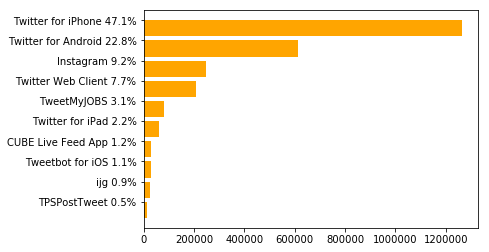

In [344]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""

tweets_df.source_name = tweets_df.source.apply(get_source_name)

source_counts = tweets_df.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="orange", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(tweets_df)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
source_counts

## Tweets by region

In [67]:
tweets_df['text'] = tweets_df['text'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
regions_df = tweets_df.groupby(['placename']).apply(filter_tweets)
regions_df = regions_df.sort_values('num_tweets', ascending=False)
regions_df.head()

/home/vmadmin/hdbc/utils.py:158: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  sedentary_behavior = count_topic(x, sedentary_pattern),
/home/vmadmin/hdbc/utils.py:159: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  sleeping = count_topic(x, sleeping_pattern),


,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
"Toronto, Ontario",43.684190,-79.384684,141155.0,16433.0,13391.0,6408.0
"Ottawa, Ontario",45.389153,-75.702170,38949.0,5046.0,4301.0,1989.0
"Montréal, Québec",45.508894,-73.585537,35156.0,3274.0,3146.0,1096.0
"Calgary, Alberta",51.040558,-114.071119,33440.0,4204.0,4746.0,3100.0
"Vancouver, British Columbia",49.266033,-123.103556,32934.0,3720.0,3241.0,1541.0


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


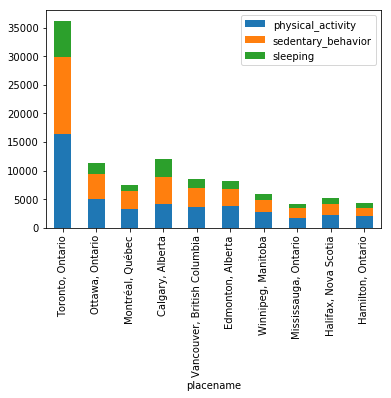

In [68]:
regions_df.ix[:10, ['physical_activity', 'sedentary_behavior', 'sleeping']].plot(kind='bar', stacked=True)

num_tweets            708586.0
physical_activity      85708.0
sedentary_behavior     73762.0
sleeping               38518.0
dtype: float64


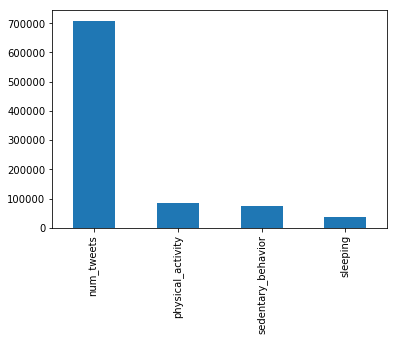

In [69]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'num_tweets':].sum().plot(kind='bar')

## Time series

In [6]:
%%time

tweets_df = pd.read_csv('./data/tweets_december.csv')
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df.index = tweets_df['created_at']
regions_df = tweets_df.groupby(['placename', pd.TimeGrouper('W')]).apply(filter_tweets)
regions_df = regions_df.sort_values('num_tweets', ascending=False)
regions_df.head()

/home/vmadmin/hdbc/utils.py:162: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  hashtags = sum(x['hashtags'].str.contains(regex) == True)
/home/vmadmin/hdbc/utils.py:163: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  text = sum(x['text'].str.contains(regex) == True)


CPU times: user 5min 35s, sys: 7.3 s, total: 5min 42s
Wall time: 5min 36s


In [21]:
regions_df = regions_df.sort_values('num_tweets', ascending=False)
regions_df.head()

latitude  longitude  num_tweets  \
placename        created_at                                     
Toronto, Ontario 2017-11-26  43.684004 -79.384540     66755.0   
                 2017-12-03  43.683902 -79.383971     35374.0   
                 2017-11-19  43.684893 -79.386084     31232.0   
Ottawa, Ontario  2017-11-26  45.390090 -75.702173     18430.0   
Montréal, Québec 2017-11-26  45.508429 -73.584796     16432.0   

                             physical_activity  sedentary_behavior  sleeping  
placename        created_at                                                   
Toronto, Ontario 2017-11-26             1965.0              5594.0     693.0  
                 2017-12-03             1051.0              3035.0     368.0  
                 2017-11-19              976.0              2756.0     332.0  
Ottawa, Ontario  2017-11-26              730.0              1846.0     188.0  
Montréal, Québec 2017-11-26              421.0              1259.0     131.0

In [7]:
regions_df.to_csv('./data/regions_weekly.csv')

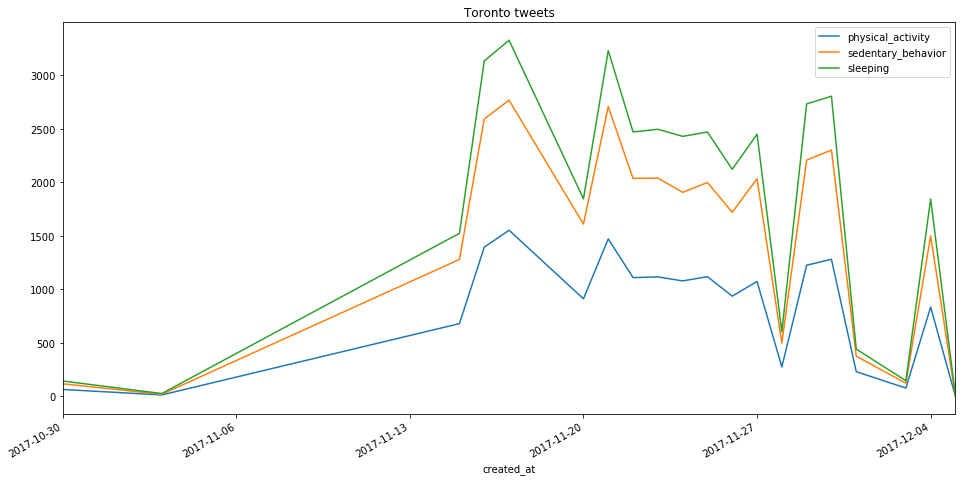

In [142]:
toronto_tweets = regions_df.loc['Toronto, Ontario']

toronto_tweets.plot(y=['physical_activity', 'sedentary_behavior', 'sleeping'], figsize=(16, 8), title='Toronto tweets', ) 

In [49]:
regions_df = pd.read_csv('./data/regions_weekly.csv').set_index('placename')
regions_df['created_at'] = pd.to_datetime(regions_df['created_at'])
mapcities_df = pd.read_csv('data/canadian_territories.csv')

In [62]:
div2idx = mapcities_df.loc[:, ['division_name', 'division_id']].set_index('division_name')
idx2div = mapcities_df.loc[:, ['division_name', 'division_id']].set_index('division_id')

In [350]:
dates

['2017-11-26', '2017-12-03', '2017-11-19', '2017-12-10', '2017-11-05']

In [349]:
regions_df.loc['Toronto, Ontario'].created_at

placename
Toronto, Ontario   2017-11-26
Toronto, Ontario   2017-12-03
Toronto, Ontario   2017-11-19
Toronto, Ontario   2017-12-10
Toronto, Ontario   2017-11-05
Name: created_at, dtype: datetime64[ns]

In [139]:
dates = [d for d in regions_df.loc['Toronto, Ontario'].created_at.dt.strftime('%Y-%m-%d')]

map_timeseries = mapcities_df.set_index('division_id').T.to_dict()
for key in map_timeseries:
    map_timeseries[key]['data'] = dict.fromkeys(dates, {})
    for date in map_timeseries[key]['data']:
        for feature in features:
            map_timeseries[key]['data'][date][feature] = 0

In [158]:
#%%time

mapcities_df = pd.read_csv('data/canadian_territories.csv')

features = ['num_tweets', 'physical_activity', 
           'sedentary_behavior', 'sleeping']

#regions_df = regions_df.reset_index(level=1)

columns = [c + d for c in features for d in regions_df.loc['Toronto, Ontario'].created_at.dt.strftime('_%d_%m_%y')]

dates = [d for d in regions_df.loc['Toronto, Ontario'].created_at.dt.strftime('%Y-%m-%d')]

map_timeseries = mapcities_df.set_index('division_id').T.to_dict()
for key in map_timeseries:
    map_timeseries[key]['data'] = []
    
#for column in columns:
#    mapcities_df[column] = 0

for idx in tqdm(range(len(regions_df))):
    idx_name = regions_df.index[idx]
    city_name = idx_name.split(',')[0]
    if not regions_df.loc[idx_name, ['latitude', 'longitude']].isnull().any().any():
        if regions_df.loc[idx_name, ['latitude', 'longitude']].size == 2:
            lat, long = regions_df.loc[idx_name, ['latitude', 'longitude']]
        else:
            lat, long = regions_df.loc[idx_name, ['latitude', 'longitude']].mean()
    else:
        lat = long = np.nan 
    mapped_city = mapcities_df.loc[mapcities_df.division_name == city_name]
    
    city_found = True
    if not mapped_city.empty:
        city_idx = mapped_city.index.values[0]
    elif not pd.isnull(lat) and not pd.isnull(long):
        #print(idx_name)
        city_idx = find_closest_city(lat, long, mapcities_df)
    else:
        city_found = False
    
    if city_found:
        if isinstance(regions_df.loc[idx_name], pd.Series):
            weekly_df = regions_df.loc[idx_name].to_frame().T
        else:
            weekly_df = regions_df.loc[idx_name]      
        for idx, row in weekly_df.iterrows():
            division_id = mapcities_df.loc[city_idx].division_id
            cdate = row.created_at.strftime('_%d_%m_%y')
            cc = [c + cdate for c in features]
            #mapcities_df.loc[city_idx, cc] += row.loc[features].values
            current_row = row.loc[features]
            current_row['date'] = row.created_at.strftime('%Y-%m-%d')
            map_timeseries[division_id]['data'].append(current_row)

100%|██████████| 14920/14920 [02:33<00:00, 97.01it/s]


In [267]:
for key, val in map_timeseries.items():
    if isinstance(map_timeseries[key]['data'], pd.DataFrame) or map_timeseries[key]['data']:
        map_timeseries[key]['data'] = pd.DataFrame(map_timeseries[key]['data']).groupby('date').sum().reset_index().to_dict(orient='records')

In [291]:
map_json = pd.DataFrame(map_timeseries).to_json()

In [286]:
map_json = pd.DataFrame(map_timeseries).T.reset_index().to_dict(orient='record')

In [293]:
with open('./data/map_output_test.json', 'w') as f:
    print("{}".format(map_json), file=f)

In [354]:
pd.DataFrame(map_timeseries).to_json()

'{"1001":{"data":[],"division_name":"Division No.  1","latitude":null,"longitude":null,"province_id":10,"province_name":"Newfoundland and Labrador \\/ Terre-Neuve-et-Labrador"},"1002":{"data":[],"division_name":"Division No.  2","latitude":null,"longitude":null,"province_id":10,"province_name":"Newfoundland and Labrador \\/ Terre-Neuve-et-Labrador"},"1003":{"data":[],"division_name":"Division No.  3","latitude":null,"longitude":null,"province_id":10,"province_name":"Newfoundland and Labrador \\/ Terre-Neuve-et-Labrador"},"1004":{"data":[],"division_name":"Division No.  4","latitude":null,"longitude":null,"province_id":10,"province_name":"Newfoundland and Labrador \\/ Terre-Neuve-et-Labrador"},"1005":{"data":[],"division_name":"Division No.  5","latitude":null,"longitude":null,"province_id":10,"province_name":"Newfoundland and Labrador \\/ Terre-Neuve-et-Labrador"},"1006":{"data":[],"division_name":"Division No.  6","latitude":null,"longitude":null,"province_id":10,"province_name":"Newf

In [289]:
with open('./data/map_output_test.json', 'w') as f:
    json.dump(map_json, f)

TypeError: key 4608 is not a string

In [107]:
mapcities_df.to_csv('./data/map_output_dec.csv', index=False)

In [8]:
mapcities_df = pd.read_csv('./data/map_output_timeseries.csv')

In [11]:
mapcities_df.head()

,province_id,province_name,division_id,division_name,latitude,longitude,num_tweets_05_11_17,num_tweets_10_12_17,num_tweets_19_11_17,num_tweets_03_12_17,...,sedentary_behavior_05_11_17,sedentary_behavior_10_12_17,sedentary_behavior_19_11_17,sedentary_behavior_03_12_17,sedentary_behavior_26_11_17,sleeping_05_11_17,sleeping_10_12_17,sleeping_19_11_17,sleeping_03_12_17,sleeping_26_11_17
0,46,Manitoba,4609,Division No. 9,49.972422,-98.289185,0.0,21.0,59.0,52.0,...,0.0,4.0,4.0,6.0,6.0,0.0,0.0,4.0,3.0,6.0
1,59,British Columbia / Colombie-Britannique,5901,East Kootenay,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59,British Columbia / Colombie-Britannique,5933,Thompson-Nicola,50.259880,-121.407011,28.0,524.0,2222.0,2559.0,...,0.0,65.0,174.0,235.0,488.0,5.0,25.0,85.0,223.0,233.0
3,48,Alberta,4816,Division No. 16,52.147651,-106.668096,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,British Columbia / Colombie-Britannique,5919,Cowichan Valley,48.811745,-123.803625,5.0,61.0,182.0,149.0,...,0.0,12.0,30.0,13.0,59.0,0.0,0.0,13.0,5.0,17.0


## Checking the highest used words

In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(tweets_df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

## Analysis